# Bias and Variance

## Exemplar Data

In [180]:
library(tidyverse)
library(plotly)

Lets work with some exemplar data:

In [181]:
set.seed(123)

make_data <- function(N = 100, deg = 2) {
    # How many data points
    err = function(n) rnorm(n, mean = 0, sd = 15)

    # What is the underlying mechanism
    a = 3
    b = 5

    # What are our observations
    x = seq(from = 1, to = 10, length.out = 100)
    y = a*x^deg + b + err(length(x))
    data.frame(x, y)
}

(d <- make_data()) |> head()


,x,y
,<dbl>,<dbl>
1,1.000000,-0.4071347
2,1.090909,5.1175856
3,1.181818,32.5707074
4,1.272727,10.9171300
5,1.363636,12.5178284
6,1.454545,37.0730822


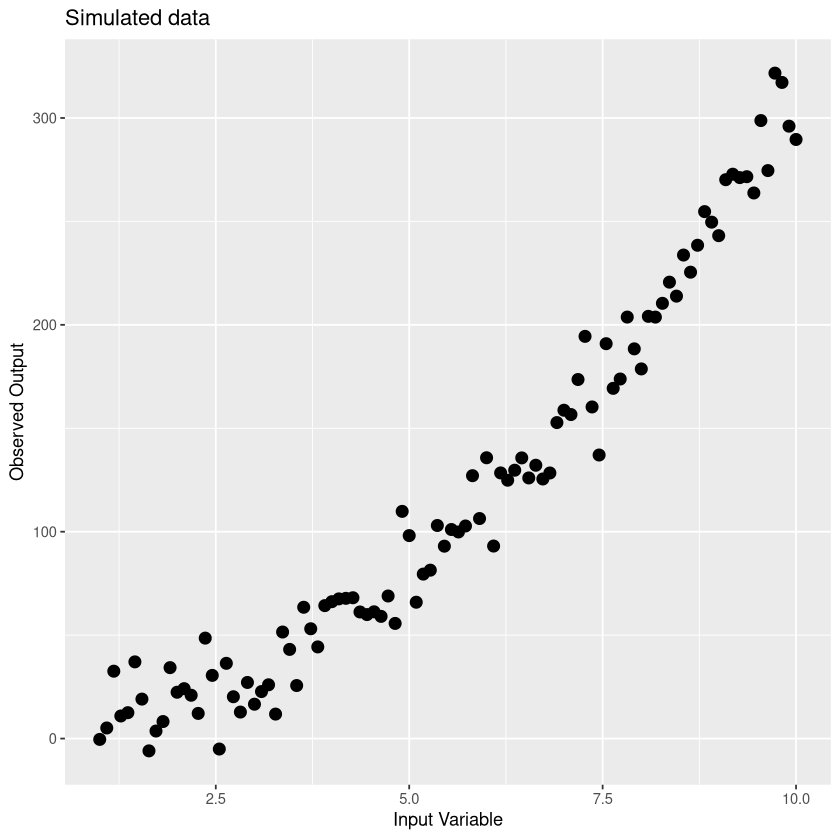

In [182]:
p <- function(data) {
    ## Could consider also pivoting here
    ## pivot_longer(d, cols = names(d)[-1], names_to = 'model')
    
    ggplot(data, aes(x = x)) +
            geom_point(size = 3, aes(y = y)) +
            labs(x     = "Input Variable",
                 y     = "Observed Output",
                 title = "Simulated data")    
}
p(d)


## Modelling the data

This data clearly follows a linear trend, let's however consider 2 different models:

In [183]:
linear_mod <- lm(y ~ x, d)
quad_mod   <- lm(y ~ poly(x, degree = 2), d)
poly_mod   <- lm(y ~ poly(x, degree = 20), d)

In [184]:
d$linear_pred <- predict(linear_mod)
d$quad_pred   <- predict(quad_mod)
d$poly_pred   <- predict(poly_mod)

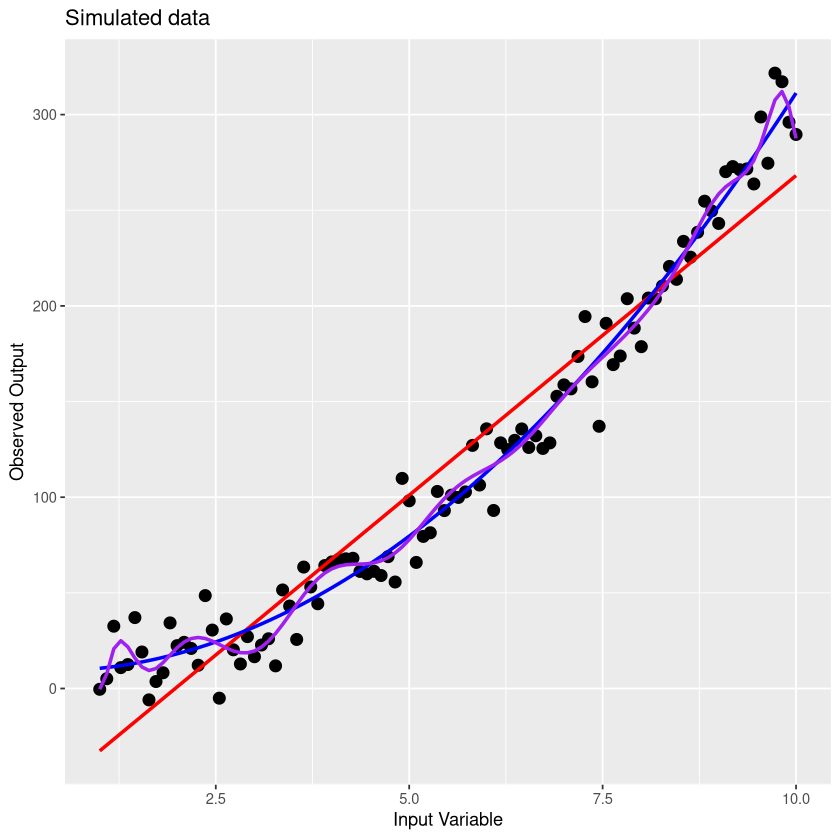

In [185]:
p(d) +
  geom_line(aes(y = linear_pred), size = 1, col = "red") +
  geom_line(aes(y = quad_pred),   size = 1, col = "blue") +
  geom_line(aes(y = poly_pred),   size = 1, col = "purple")

## Comparing the Models

Clearly the blue model is not a great model for the data, it essentially draws a line to each point.

## Testing and Training Split

If we took a testing set from this population:

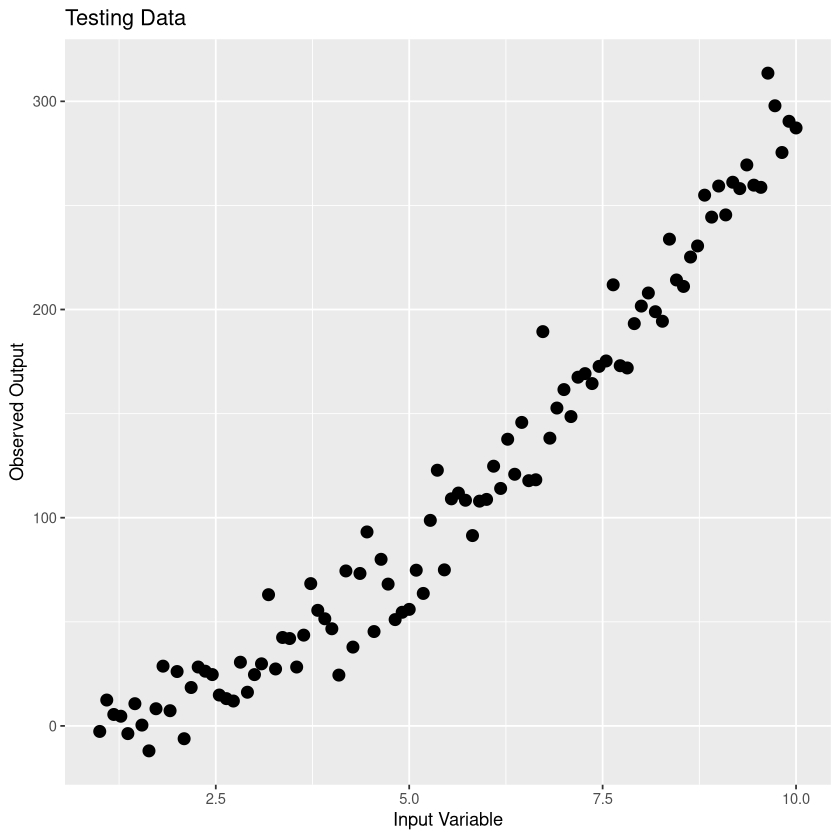

In [186]:
testing <- make_data(200)
p(testing) +
    labs(title = "Testing Data")

and use our models on this data to make predictions:

In [187]:
testing$linear_pred <- predict(linear_mod, newdata = testing[,1:2])
testing$quad_pred   <- predict(quad_mod, newdata = testing[,1:2])
testing$poly_pred   <- predict(poly_mod, newdata = testing[,1:2])

We can compare the error that we observed in testing and training:

In [188]:
ss   <- function(yhat, y)   (yhat-y)^2
loss <- function(yhat, y) sqrt(mean(ss(yhat, y))) |> round()

In [189]:
errors <- data.frame(
    rbind(
        c("testing" , "linear", loss(testing$y, testing$linear_pred)),
        c("testing" , "quad"  , loss(testing$y, testing$quad_pred)  ),
        c("testing" , "poly"  , loss(testing$y, testing$poly_pred)  ),
        c("training", "linear", loss(      d$y,       d$linear_pred)),
        c("training", "quad"  , loss(      d$y,       d$quad_pred)  ),
        c("training", "poly"  , loss(      d$y,       d$poly_pred)  )
    ))

colnames(errors) <- c("set", "model", "value")
errors$set       <- factor(errors$set)
errors$model     <- factor(errors$model, levels = c('linear', 'quad', 'poly'))

errors

set,model,value
<fct>,<fct>,<chr>
testing,linear,22
testing,quad,15
testing,poly,15
training,linear,24
training,quad,14
training,poly,12


If this is visualised:

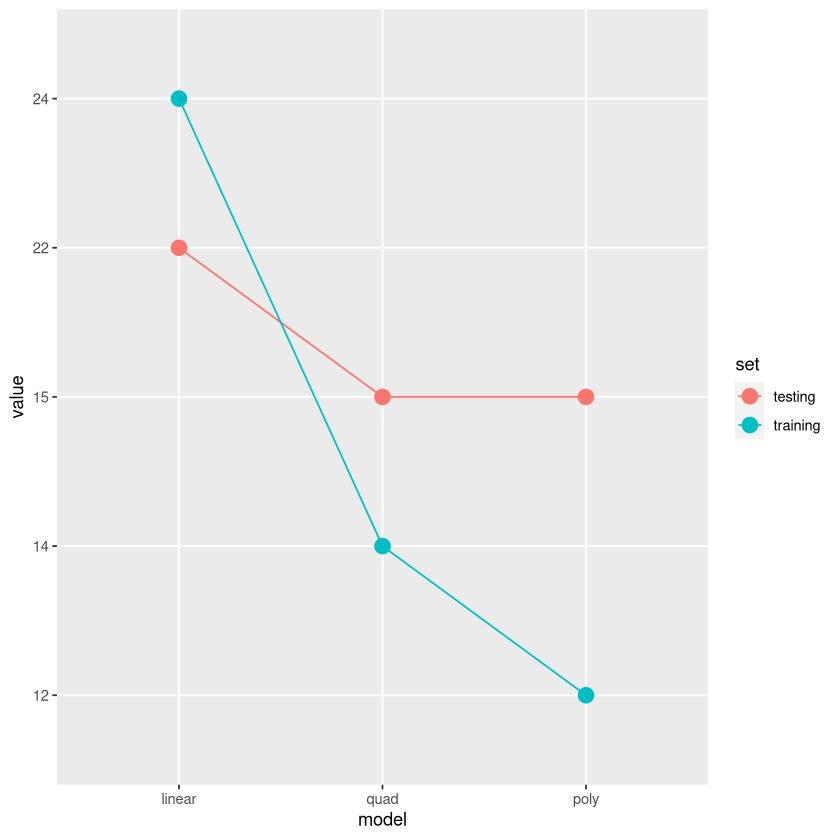

In [190]:
ggplot(errors, aes(x = model, col = set, y = value, group = set)) +
    geom_point(size = 4) +
    geom_line()

What we noticed is that the training error can be made arbitrarily low, so long as the flexibility is made sufficiently high, the issue is that the model does not generalise well.

## Bias and Variance

It can be shown that any estimate of testing error can be broken up into:

$$
{\rm E}\left({\rm rss}\left(y,\hat{y}\right)\right)={\rm var}\left(\hat{y}\right)+\left({\rm bias}\left(\hat{y}\right)\right)^{2}+{\rm var}\left(\varepsilon\right)
$$

Where:

* **Variance** measures how much the model dependended on that specific training set
* **Bias** measures how poorly the model fits the testing data
* $\varepsilon$ is random error / noise

In this example the linear model introduced a lot of bias into the estimate but the polynomial introduced a lot of variance.

These two values trade off and our goal is to minimise the testing error by balancing them, this occurs at the intersection in the above plot at degree=2.

$$
{\rm E}\left({\rm rss}\left(y,\hat{y}\right)\right)=\underset{\text{Across Models}}{\underbrace{{\rm var}\left(\hat{y}\right)}}+\underset{\text{Within Models}}{\underbrace{\left({\rm bias}\left(\hat{y}\right)\right)^{2}}}+{\rm var}\left(\varepsilon\right)
$$

## TODO Repeat this for many polynomials

In [203]:
(runif(6)-0.5)*10

[1] -1.367384  3.841336  2.752972 -3.607964 -2.049907 -3.739172

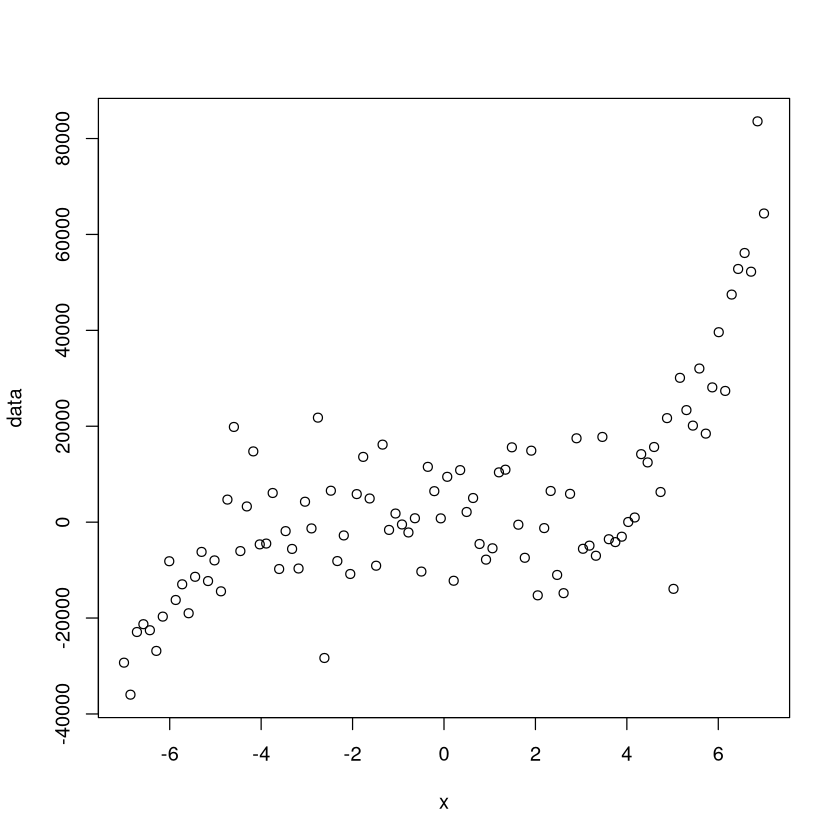

In [233]:
x <- seq(from = -7, to = 7, length.out = 100)
data <- 3.4*x^5 + 9.8*x^4 -4*x^3 - 1.6*x^2 + 1.8*x -1.8*x + rnorm(n = length(x), mean = 0, sd = 10000)
plot(x, data)

In [234]:
for (d in 1:10) {
    mod <- lm(x ~ poly(x, degree = d))
    
}

In [8]:
mat <- matrix(1:4, nrow = 2)
mat <- t(mat)
mat

1,2
3,4


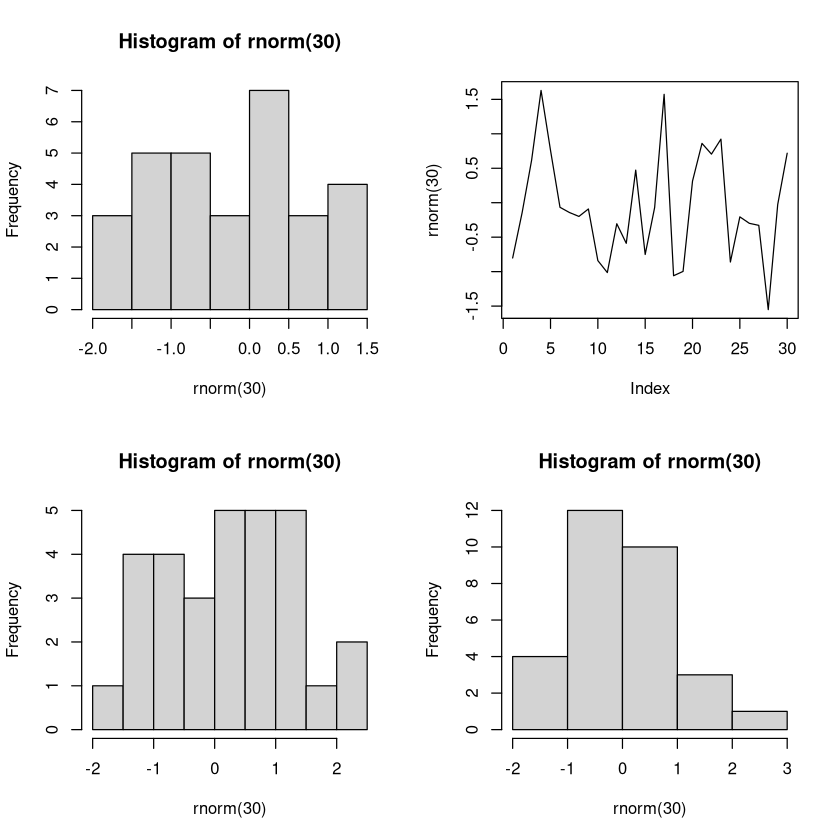

In [7]:
layout(mat)
hist(rnorm(30))
plot(rnorm(30), type = 'l')
hist(rnorm(30))
hist(rnorm(30))


In [13]:
(f <- factor(c("Low", "High", "Low"), ordered = TRUE))

[1] Low  High Low 
Levels: High < Low

In [15]:
?factors